 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [62]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [63]:
def lin(a,b,x): return a*x+b

In [64]:
a=3.
b=8.

In [66]:
n=30
x = random(n)
y = lin(a,b,x)

In [67]:
x

array([ 0.7764,  0.0631,  0.4894,  0.384 ,  0.8508,  0.0939,  0.2139,  0.4364,  0.4054,  0.7651,
        0.8928,  0.6721,  0.5885,  0.9992,  0.3168,  0.6453,  0.4109,  0.6717,  0.3441,  0.6099,
        0.7529,  0.631 ,  0.4393,  0.2336,  0.8165,  0.9132,  0.3507,  0.4363,  0.1148,  0.9382])

In [68]:
y

array([ 10.3292,   8.1894,   9.4682,   9.152 ,  10.5525,   8.2818,   8.6417,   9.3091,   9.2162,
        10.2952,  10.6785,  10.0162,   9.7654,  10.9976,   8.9504,   9.936 ,   9.2327,  10.015 ,
         9.0322,   9.8298,  10.2588,   9.8929,   9.3179,   8.7009,  10.4495,  10.7395,   9.052 ,
         9.3088,   8.3445,  10.8147])

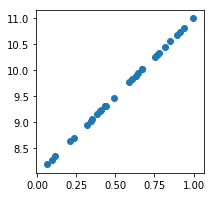

In [69]:
plt.scatter(x,y)

In [70]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [71]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.2268

In [72]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [73]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

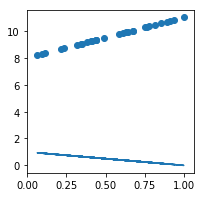

In [74]:
plt.scatter(x,y)
plt.plot(x, lin(a_guess, b_guess, x))

In [75]:
for i in range(20):
    upd()

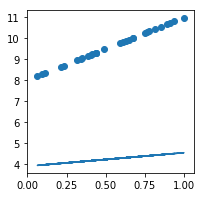

In [76]:
plt.scatter(x,y)
plt.plot(x, lin(a_guess, b_guess, x))

In [77]:
for i in range(200):
    upd()

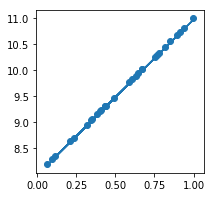

In [78]:
plt.scatter(x,y)
plt.plot(x, lin(a_guess, b_guess, x))